# Proyecto 1

**Tema:** Predicción de enfermedades Cardíacas



|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Análisis Exploratorio de Datos
### Análisis Univariado

## Summary

Tenemos dos grupos de variables: las numéricas y las categóricas. Además, una variable _target_ a estudiar.


### Variables Numéricas

- Edad (age)
- Presión Arterial en Reposo (trestbps)
- Colesterol Sérico (chol)
- Frecuencia Cardiaca Máxima (thalach)
- Depresion del ST Inducida por Ejercicio en Relación con Reposo (oldpeak)

### Variables Categóricas

- Sexo (sex)
- Tipo de Dolor en Pecho (cp)
- Azucar en Sange en Ayunas (fbs)
- Resultados Electrocardiográficos en Reposo (restecg)
- Angina Inducida por Ejercicio (exang)
- Pendiente Segmento ST de Ejercicio Máximo (slope)
- Número de Vasos Principales coloreados por Fluoroscopia (ca)
- Thalassemia (thal)
- Presencia de Enfermedad Cardiaca (heartdis)

## Librerías Requeridas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Datos

In [4]:
columnas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv("../../Data/processed.cleveland.data", names=columnas)

df.age = df.age.astype(int)
df.sex = df.sex.astype(int)
df.cp = df.cp.astype(int)
df.trestbps = df.trestbps.astype(int)
df.chol = df.chol.astype(int)
df.fbs = df.fbs.astype(int)
df.restecg = df.restecg.astype(int)
df.thalach = df.thalach.astype(int)
df.exang = df.exang.astype(int)
df.slope = df.slope.astype(int)

# ------------
# Null values
# ------------

df['caNull'] = df['ca']
df.loc[df['caNull'] == '?', 'ca'] = float(df.ca.mode()[0])
df.loc[df['caNull'] != '?', 'ca'] = df['ca']
df['ca'] = pd.to_numeric(df['ca']).astype('int32')

df['thalNull'] = df['thal']
df.loc[df['thalNull'] == '?', 'thal'] = float(df.thal.mode()[0])
df.loc[df['thalNull'] != '?', 'thal'] = df['thal']
df['thal'] = pd.to_numeric(df['thal']).astype('int32')

# ------------
# Target
# ------------

df.loc[df['num'] == 0, 'heartdis'] = 0
df.loc[df['num'] != 0, 'heartdis'] = 1
df.heartdis = df.heartdis.astype(int)

# ------------
# Drop columns
# ------------
df.drop(['num', 'caNull', 'thalNull'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## Numéricas

### age

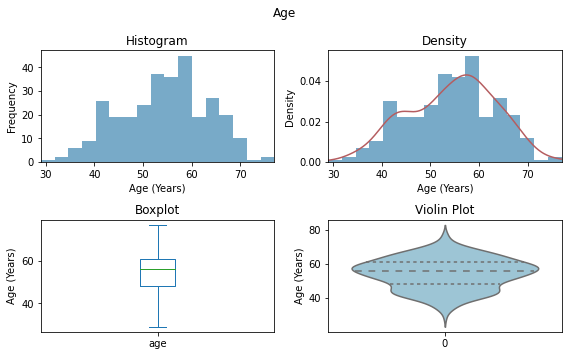

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

var = 'Age (Years)'

# 1, 1
bins= int(len(df)**(1/2))
df.age.plot(kind='hist', xlim=[int(df.age.min()), int(df.age.max())], bins=bins, ax=axes[0, 0], color=(120/255, 170/255, 200/255))
axes[0, 0].set_xlabel(var)
axes[0, 0].set_title('Histogram')

# 1, 2
bins= int(len(df)**(1/2))
df.age.plot.hist(density=True, xlim=[int(df.age.min()), int(df.age.max())], bins=bins, ax=axes[0, 1], color=(120/255, 170/255, 200/255))
df.age.plot.density(ax=axes[0, 1], color=(181/255, 93/255, 96/255))
axes[0, 1].set_xlabel(var)
axes[0, 1].set_title('Density')

# 2, 1
df.age.plot.box(ax=axes[1, 0])
axes[1, 0].set_ylabel(var)
axes[1, 0].set_title('Boxplot')

# 2, 2
sns.violinplot(df.age, inner='quartile', ax=axes[1, 1], color=(148/255, 201/255, 222/255))
axes[1, 1].set_ylabel(var)
axes[1, 1].set_title('Violin Plot')

fig.suptitle(f'Age')
plt.tight_layout()
plt.show()

### trestbps

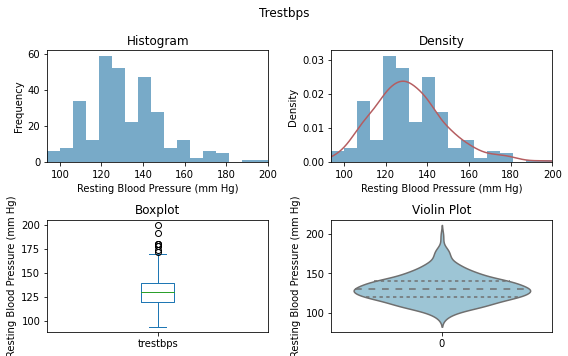

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

var = 'Resting Blood Pressure (mm Hg)'

# 1, 1
bins= int(len(df)**(1/2))
df.trestbps.plot(kind='hist', xlim=[int(df.trestbps.min()), int(df.trestbps.max())], bins=bins, ax=axes[0, 0], color=(120/255, 170/255, 200/255))
axes[0, 0].set_xlabel(var)
axes[0, 0].set_title('Histogram')

# 1, 2
bins= int(len(df)**(1/2))
df.trestbps.plot.hist(density=True, xlim=[int(df.trestbps.min()), int(df.trestbps.max())], bins=bins, ax=axes[0, 1], color=(120/255, 170/255, 200/255))
df.trestbps.plot.density(ax=axes[0, 1], color=(181/255, 93/255, 96/255))
axes[0, 1].set_xlabel(var)
axes[0, 1].set_title('Density')

# 2, 1
df.trestbps.plot.box(ax=axes[1, 0])
axes[1, 0].set_ylabel(var)
axes[1, 0].set_title('Boxplot')

# 2, 2
sns.violinplot(df.trestbps, inner='quartile', ax=axes[1, 1], color=(148/255, 201/255, 222/255))
axes[1, 1].set_ylabel(var)
axes[1, 1].set_title('Violin Plot')

fig.suptitle(f'Trestbps')
plt.tight_layout()
plt.show()

### chol

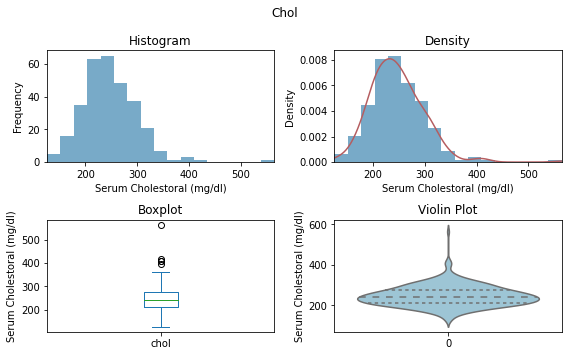

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

var = 'Serum Cholestoral (mg/dl)'

# 1, 1
bins= int(len(df)**(1/2))
df.chol.plot(kind='hist', xlim=[int(df.chol.min()), int(df.chol.max())], bins=bins, ax=axes[0, 0], color=(120/255, 170/255, 200/255))
axes[0, 0].set_xlabel(var)
axes[0, 0].set_title('Histogram')

# 1, 2
bins= int(len(df)**(1/2))
df.chol.plot.hist(density=True, xlim=[int(df.chol.min()), int(df.chol.max())], bins=bins, ax=axes[0, 1], color=(120/255, 170/255, 200/255))
df.chol.plot.density(ax=axes[0, 1], color=(181/255, 93/255, 96/255))
axes[0, 1].set_xlabel(var)
axes[0, 1].set_title('Density')

# 2, 1
df.chol.plot.box(ax=axes[1, 0])
axes[1, 0].set_ylabel(var)
axes[1, 0].set_title('Boxplot')

# 2, 2
sns.violinplot(df.chol, inner='quartile', ax=axes[1, 1], color=(148/255, 201/255, 222/255))
axes[1, 1].set_ylabel(var)
axes[1, 1].set_title('Violin Plot')

fig.suptitle(f'Chol')
plt.tight_layout()
plt.show()

### thalach

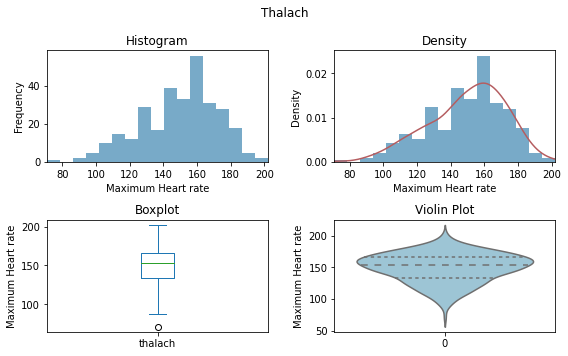

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

var = 'Maximum Heart rate'

# 1, 1
bins= int(len(df)**(1/2))
df.thalach.plot(kind='hist', xlim=[int(df.thalach.min()), int(df.thalach.max())], bins=bins, ax=axes[0, 0], color=(120/255, 170/255, 200/255))
axes[0, 0].set_xlabel(var)
axes[0, 0].set_title('Histogram')

# 1, 2
bins= int(len(df)**(1/2))
df.thalach.plot.hist(density=True, xlim=[int(df.thalach.min()), int(df.thalach.max())], bins=bins, ax=axes[0, 1], color=(120/255, 170/255, 200/255))
df.thalach.plot.density(ax=axes[0, 1], color=(181/255, 93/255, 96/255))
axes[0, 1].set_xlabel(var)
axes[0, 1].set_title('Density')

# 2, 1
df.thalach.plot.box(ax=axes[1, 0])
axes[1, 0].set_ylabel(var)
axes[1, 0].set_title('Boxplot')

# 2, 2
sns.violinplot(df.thalach, inner='quartile', ax=axes[1, 1], color=(148/255, 201/255, 222/255))
axes[1, 1].set_ylabel(var)
axes[1, 1].set_title('Violin Plot')

fig.suptitle(f'Thalach')
plt.tight_layout()
plt.show()

### oldpeak

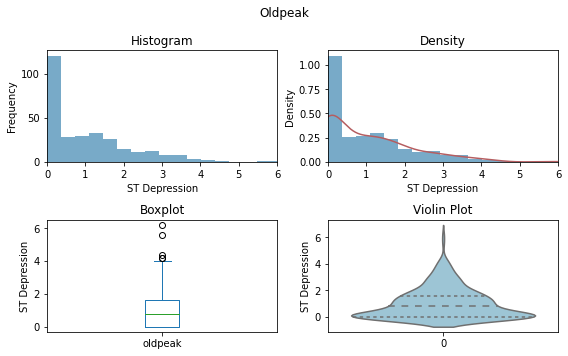

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

var = 'ST Depression'

# 1, 1
bins= int(len(df)**(1/2))
df.oldpeak.plot(kind='hist', xlim=[int(df.oldpeak.min()), int(df.oldpeak.max())], bins=bins, ax=axes[0, 0], color=(120/255, 170/255, 200/255))
axes[0, 0].set_xlabel(var)
axes[0, 0].set_title('Histogram')

# 1, 2
bins= int(len(df)**(1/2))
df.oldpeak.plot.hist(density=True, xlim=[int(df.oldpeak.min()), int(df.oldpeak.max())], bins=bins, ax=axes[0, 1], color=(120/255, 170/255, 200/255))
df.oldpeak.plot.density(ax=axes[0, 1], color=(181/255, 93/255, 96/255))
axes[0, 1].set_xlabel(var)
axes[0, 1].set_title('Density')

# 2, 1
df.oldpeak.plot.box(ax=axes[1, 0])
axes[1, 0].set_ylabel(var)
axes[1, 0].set_title('Boxplot')

# 2, 2
sns.violinplot(df.oldpeak, inner='quartile', ax=axes[1, 1], color=(148/255, 201/255, 222/255))
axes[1, 1].set_ylabel(var)
axes[1, 1].set_title('Violin Plot')

fig.suptitle(f'Oldpeak')
plt.tight_layout()
plt.show()

## Categóricas

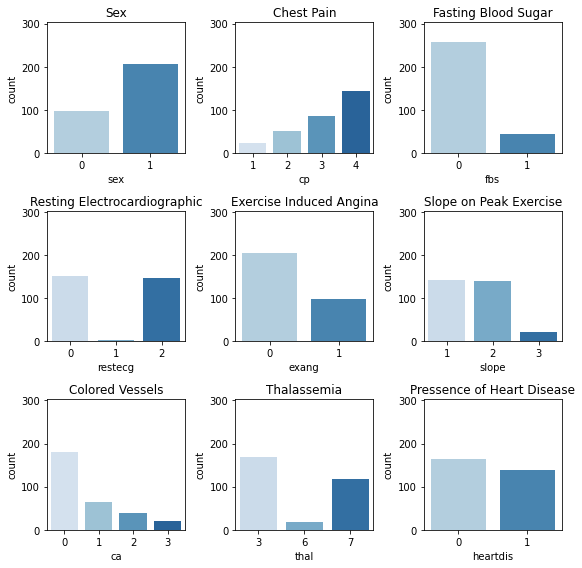

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

largo = len(df)

# 1 , 1 - Sex
sns.countplot(data=df, x='sex', palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Sex')
axes[0, 0].set_ylim([0, largo])

# 1 , 2 - Cp
sns.countplot(data=df, x='cp', palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Chest Pain')
axes[0, 1].set_ylim([0, largo])

# 1 , 3 - Fbs
sns.countplot(data=df, x='fbs', palette='Blues', ax=axes[0, 2])
axes[0, 2].set_title('Fasting Blood Sugar')
axes[0, 2].set_ylim([0, largo])

# 2 , 1 - restecg
sns.countplot(data=df, x='restecg', palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Resting Electrocardiographic')
axes[1, 0].set_ylim([0, largo])

# 2 , 2 - exang
sns.countplot(data=df, x='exang', palette='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Exercise Induced Angina')
axes[1, 1].set_ylim([0, largo])

# 2 , 3 - slope
sns.countplot(data=df, x='slope', palette='Blues', ax=axes[1, 2])
axes[1, 2].set_title('Slope on Peak Exercise')
axes[1, 2].set_ylim([0, largo])

# 3 , 1 - exang
sns.countplot(data=df, x='ca', palette='Blues', ax=axes[2, 0])
axes[2, 0].set_title('Colored Vessels')
axes[2, 0].set_ylim([0, largo])

# 3 , 2 - slope
sns.countplot(data=df, x='thal', palette='Blues', ax=axes[2, 1])
axes[2, 1].set_title('Thalassemia')
axes[2, 1].set_ylim([0, largo])

# 3 , 3 - heartdis
sns.countplot(data=df, x='heartdis', palette='Blues', ax=axes[2, 2])
axes[2, 2].set_title('Pressence of Heart Disease')
axes[2, 2].set_ylim([0, largo])

plt.tight_layout()
plt.show()